Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

sns.set_style('darkgrid')

Load Data

In [101]:
df=pd.read_csv('E:/My Projects/Datasets/Ames Houses/Ames_Housing_Data.csv')
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [104]:
X=df.drop('SalePrice',axis=1)
y=df.SalePrice

Describing dataset

In [105]:
numerical_columns=X.select_dtypes(exclude='object').columns
print(f"Our Dataset has {len(numerical_columns)} numerical columns : \n ",(numerical_columns))

Our Dataset has 37 numerical columns : 
  Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype='object')


In [106]:
categorical_columns=X.select_dtypes(include='object').columns
print(f"Our Dataset has {len(categorical_columns)} Categorical columns : \n ",(categorical_columns))

Our Dataset has 43 Categorical columns : 
  Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')


In [ ]:
file_path='E:/My Projects/Datasets/Ames Houses/Ames_Housing_Feature_Description.txt'
with open(file_path, 'r') as file:
    for line in file:
        print(line.strip())  # strip to remove newline characters

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

# 2. Exploratory Data Analysis

2.1. Sale Price

let's Explore target variable (Sale Price)

Text(0.5, 1.0, 'House Prices Distribution')

<Figure size 800x500 with 0 Axes>

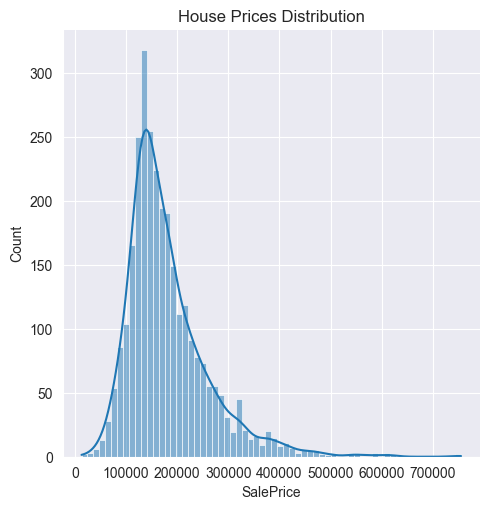

In [108]:
plt.figure(figsize=(8,5))
sns.displot(y,kde=True)
plt.title('House Prices Distribution')

The distribution of SalePrice is right-skewed. Let's check its Skewness and Kurtosis statistics.

In [109]:
print(f"Skewness of House prices is : ",y.skew())
print(f"Kurtosis of House prices is : ",y.kurtosis())

Skewness of House prices is :  1.7435000757376466
Kurtosis of House prices is :  5.118899951130896


2.2. Numerical Features

Top 15 numerical variables highly correlated with SalePrice:

In [115]:
correlation_with_SalePrice=df.select_dtypes(exclude='object').corr().SalePrice
abs(correlation_with_SalePrice).sort_values(ascending=False).head(16)

SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.526965
Mas Vnr Area      0.508285
TotRms AbvGrd     0.495474
Fireplaces        0.474558
BsmtFin SF 1      0.432914
Lot Frontage      0.357318
Name: SalePrice, dtype: float64

What are the top Features selected by Recursive Feature Elimination techniques<br>

In [94]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

RFR=RandomForestRegressor(n_estimators=80,max_depth=15)
LR=LinearRegression()


In [99]:
def feature_selection(model):
    '''
    This Function will take any ML model and will return list of 15 most important featrures 
    '''
    selector=RFE(estimator=model,n_features_to_select=15,step=1)
    selector.fit(df.fillna(0).select_dtypes(exclude='object'),df['SalePrice'])
    selected_feature=list(df.select_dtypes(exclude='object').columns[selector.support_])
    return selected_feature

In [100]:
pd.DataFrame({
    'Feature_selector(RFR)':feature_selection(RFR),
    'Feature_selector(LR)':feature_selection(LR)
    })

,Feature_selector(RFR),Feature_selector(LR)
0,PID,Lot Frontage
1,Lot Frontage,Overall Qual
2,Lot Area,Overall Cond
3,Overall Cond,Bsmt Full Bath
4,Year Remod/Add,Bsmt Half Bath
5,Mas Vnr Area,Full Bath
6,BsmtFin SF 1,Half Bath
7,Bsmt Unf SF,Bedroom AbvGr
8,2nd Flr SF,Kitchen AbvGr
9,Gr Liv Area,TotRms AbvGrd


Recursive Feature selector is working well with Linear regression model as most of feature slected by it also has high correlation with Sale Price

According to above analyses<br>
Overall Quality, Living Area, Number of Full Baths, Size of Garage and Year Built, lot frontage<br>
are some of the most important features in determining house price.<br>
 Let's take a closer look at them.

Overall Quality

Overall quality is the most important feature in both analyses. It is clear that higher quality makes the house more expensiv

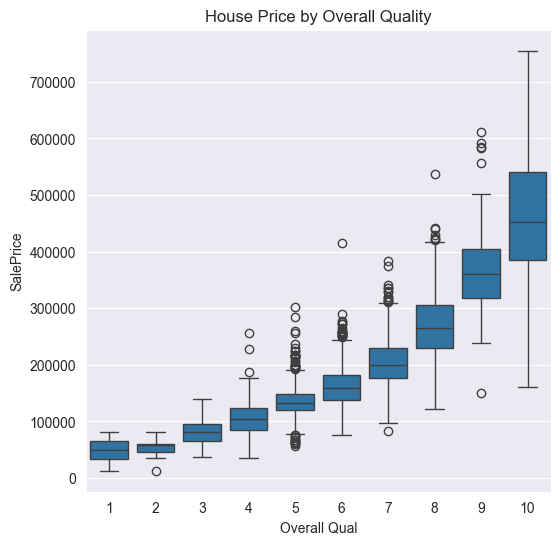

In [122]:
plt.figure(figsize=(6,6))

sns.boxplot(data=df,x='Overall Qual',y='SalePrice')
title = plt.title('House Price by Overall Quality')


Living Area<br>

Living area has a linear relationship with house price. In the scatter plot below, we can clearly see some outliers in the data, especially the three houses in the lower-right corner with living area greater than 4000 sqft and price lower than $200,000.

Corelation :  0.7067799209766268


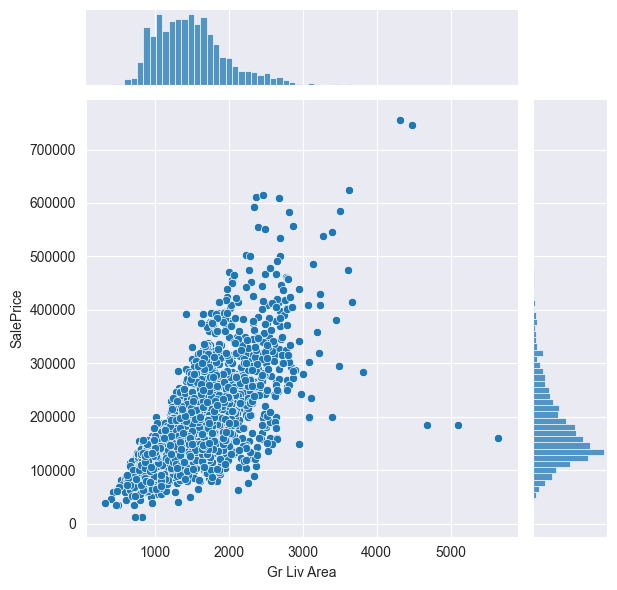

In [156]:
def plotcorrelation(variables):
    '''
    1.Print correlation of two variable 
    2.create joint plot of two variables
    '''
    # Print Corelation
    print(f"Corelation : ",df[[variables[0],variables[1]]].corr().iloc[0,1])

    sns.jointplot(data=df,
                   x=variables[0],
                   y=variables[1],
                   )

    # Create jointplot     


plotcorrelation(['Gr Liv Area','SalePrice'])

GarageCars

Interestingly, houses with garage which can hold 4 cars are cheaper than houses with 3-car garages

Text(0.5, 1.0, 'House Price by Garage Size')

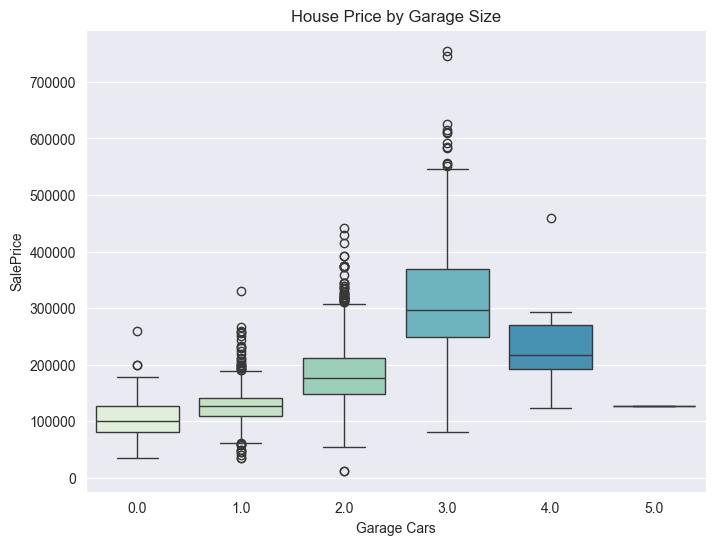

In [138]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Garage Cars', y='SalePrice', data=df, palette='GnBu')
plt.title('House Price by Garage Size')

Year Built

The age of the house also plays an important role in its price. Newer houses have higher average prices. There are several houses built before 1900 having a high price.

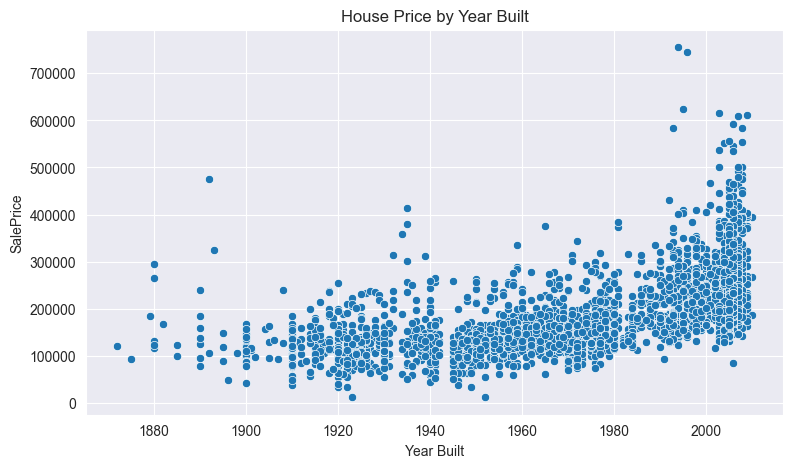

In [158]:
plt.figure(figsize=(9,5))

sns.scatterplot(data=df,x='Year Built',y='SalePrice')

title = plt.title('House Price by Year Built')